<a href="https://colab.research.google.com/github/Philip-21/mL_wokspace/blob/main/hamoye1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np

url = 'http://bit.ly/HDSC-Dataset'
df = pd.read_csv(url)
df

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570
...,...,...,...,...,...,...,...,...,...,...,...
29518,f1_fuel_2018_12_12_0_13,12,2018,neil simpson ct #1,gas,mcf,18799.0,1.059,4.78,4.78,9.030
29519,f1_fuel_2018_12_12_1_1,12,2018,cheyenne prairie 58%,gas,mcf,806730.0,1.050,3.65,3.65,6.950
29520,f1_fuel_2018_12_12_1_10,12,2018,lange ct facility,gas,mcf,104554.0,1.060,4.77,4.77,8.990
29521,f1_fuel_2018_12_12_1_13,12,2018,wygen 3 bhp 52%,coal,ton,315945.0,16.108,3.06,14.76,1.110


In [ ]:
df.describe()  #getting statistics of the dataset

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.000000,29523.000000,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
mean,118.601836,2005.806050,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,74.178353,7.025483,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,2000.000000,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,122.000000,2006.000000,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,176.000000,2012.000000,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


In [ ]:
df.describe(include='all')  #more statistical analysis in data set

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523,29523.000000,29523.000000,29523,29523,29343,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
unique,29523,NaN,NaN,2315,6,9,NaN,NaN,NaN,NaN,NaN
top,f1_fuel_2006_12_176_1_14,NaN,NaN,big stone,gas,mcf,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,156,11486,11354,NaN,NaN,NaN,NaN,NaN
mean,NaN,118.601836,2005.806050,NaN,NaN,NaN,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,NaN,74.178353,7.025483,NaN,NaN,NaN,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,NaN,1.000000,1994.000000,NaN,NaN,NaN,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,NaN,55.000000,2000.000000,NaN,NaN,NaN,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,NaN,122.000000,2006.000000,NaN,NaN,NaN,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,NaN,176.000000,2012.000000,NaN,NaN,NaN,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000


In [ ]:
df.skew() #no symmetry in the column values except the report_year

utility_id_ferc1                  0.605070
report_year                       0.006953
fuel_qty_burned                  15.851495
fuel_mmbtu_per_unit               4.135217
fuel_cost_per_unit_burned        19.787440
fuel_cost_per_unit_delivered    105.014227
fuel_cost_per_mmbtu             171.675535
dtype: float64

In [ ]:
df.isnull()#checking for missing values

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
29518,False,False,False,False,False,False,False,False,False,False,False
29519,False,False,False,False,False,False,False,False,False,False,False
29520,False,False,False,False,False,False,False,False,False,False,False
29521,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.describe(include='all').isnull() #checking for missing values with the statistical sets  True represents the prescence of missing values 

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,False,False,False,False,False,False,False,False,False,False,False
unique,False,True,True,False,False,False,True,True,True,True,True
top,False,True,True,False,False,False,True,True,True,True,True
freq,False,True,True,False,False,False,True,True,True,True,True
mean,True,False,False,True,True,True,False,False,False,False,False
std,True,False,False,True,True,True,False,False,False,False,False
min,True,False,False,True,True,True,False,False,False,False,False
25%,True,False,False,True,True,True,False,False,False,False,False
50%,True,False,False,True,True,True,False,False,False,False,False
75%,True,False,False,True,True,True,False,False,False,False,False


In [ ]:
df.describe(include='all').dropna(inplace=True, axis=1) #removing the Nan values on the rows of the statistical set 

In [ ]:
#Using groupby() to group the dataset 'fuel_cost_per_unit_burned' and splitting the data into separate groups
df.groupby('fuel_cost_per_unit_burned')

In [ ]:
#finding out count of different location 
df.groupby('fuel_cost_per_unit_burned').count()


,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
fuel_cost_per_unit_burned,,,,,,,,,,
-276.080,1,1,1,1,1,1,1,1,1,1
-174.670,1,1,1,1,1,1,1,1,1,1
-123.310,1,1,1,1,1,1,1,1,1,1
-119.040,1,1,1,1,1,1,1,1,1,1
-85.760,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
65137.588,1,1,1,1,1,1,1,1,1,1
69785.215,1,1,1,1,1,1,1,1,1,1
80459.000,1,1,1,1,1,1,1,1,1,1


In [ ]:
#the agg() gives the flexibility to perform several statistical computations all at once
df.groupby('fuel_cost_per_unit_burned').agg([np.mean,np.median,np.var])

utility_id_ferc1         ... fuel_cost_per_mmbtu    
                                      mean median  ...              median var
fuel_cost_per_unit_burned                          ...                        
-276.080                             194.0  194.0  ...              -8.906 NaN
-174.670                             194.0  194.0  ...              -5.635 NaN
-123.310                             194.0  194.0  ...              -3.978 NaN
-119.040                             281.0  281.0  ...              -5.750 NaN
-85.760                              194.0  194.0  ...              -3.186 NaN
...                                    ...    ...  ...                 ...  ..
 65137.588                             7.0    7.0  ...               0.976 NaN
 69785.215                             7.0    7.0  ...               1.046 NaN
 80459.000                           177.0  177.0  ...              13.445 NaN
 83538.000                           132.0  132.0  ...              14.207 NaN
 139358.000                          147.0  147.0  ...              22.577 NaN

[19416 rows x 18 columns]

In [ ]:
#combining  GroupBy with multiple indexes to get better insights from our data to perform diff statistical computation
df.groupby(['fuel_cost_per_unit_burned','fuel_qty_burned']).agg([np.mean,np.median,np.var])

utility_id_ferc1         ... fuel_cost_per_mmbtu    
                                                      mean median  ...              median var
fuel_cost_per_unit_burned fuel_qty_burned                          ...                        
-276.080                  39.0                       194.0  194.0  ...              -8.906 NaN
-174.670                  116.0                      194.0  194.0  ...              -5.635 NaN
-123.310                  77.0                       194.0  194.0  ...              -3.978 NaN
-119.040                  1159.0                     281.0  281.0  ...              -5.750 NaN
-85.760                   6072.0                     194.0  194.0  ...              -3.186 NaN
...                                                    ...    ...  ...                 ...  ..
 65137.588                465.0                        7.0    7.0  ...               0.976 NaN
 69785.215                467.0                        7.0    7.0  ...               1.046 NaN
 80459.000                76.0                       177.0  177.0  ...              13.445 NaN
 83538.000                150.0                      132.0  132.0  ...              14.207 NaN
 139358.000               49418.0                    147.0  147.0  ...              22.577 NaN

[29218 rows x 15 columns]

**VISUALIZING THE DATASET**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

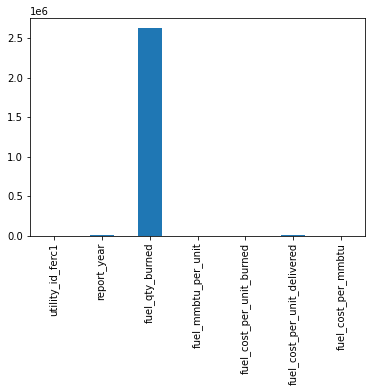

In [ ]:
df.mean().plot(kind='bar')

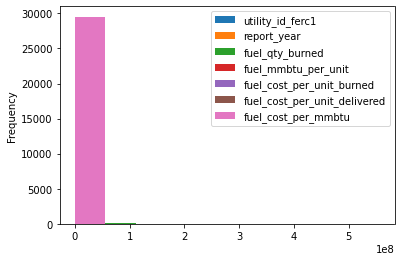

In [ ]:
df.plot(kind='hist')

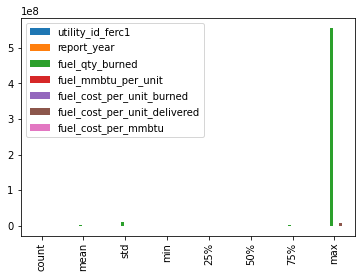

In [ ]:
df.describe().plot(kind='bar')